In [16]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np

In [2]:
from renewableopt.battery.data_import import import_datafile, DATA_DIR
from pathlib import Path

In [3]:
from renewableopt.battery.feature_extraction import CapacityData

In [4]:
c = CapacityData.load(DATA_DIR / 'aging.npz')

In [5]:
list(DATA_DIR.iterdir())

[PosixPath('/home/sean/disk_drive/li_ion_battery_degradation_data/doe_strobl/Multi-Stage_Aging_Study/.~lock.experiments_meta.csv#'),
 PosixPath('/home/sean/disk_drive/li_ion_battery_degradation_data/doe_strobl/Multi-Stage_Aging_Study/aging.npz'),
 PosixPath('/home/sean/disk_drive/li_ion_battery_degradation_data/doe_strobl/Multi-Stage_Aging_Study/experiments_meta.csv'),
 PosixPath('/home/sean/disk_drive/li_ion_battery_degradation_data/doe_strobl/Multi-Stage_Aging_Study/Stage_1'),
 PosixPath('/home/sean/disk_drive/li_ion_battery_degradation_data/doe_strobl/Multi-Stage_Aging_Study/Stage_2'),
 PosixPath('/home/sean/disk_drive/li_ion_battery_degradation_data/doe_strobl/Multi-Stage_Aging_Study/test_dir')]

In [6]:
c.keys()

dict_keys(['TP_z07_03_1', 'TP_z14_02_1', 'TP_z01_01_1', 'TP_z01_02_1', 'TP_z01_03_1', 'TP_z02_01_1', 'TP_z02_02_1', 'TP_z02_03_1', 'TP_z03_01_1', 'TP_z03_02_1', 'TP_z03_03_1', 'TP_z04_01_1', 'TP_z04_02_1', 'TP_z04_03_1', 'TP_z05_01_1', 'TP_z05_02_1', 'TP_z05_03_1', 'TP_z06_01_1', 'TP_z06_02_1', 'TP_z06_03_1', 'TP_z07_01_1', 'TP_z07_02_1', 'TP_z14_03_1', 'TP_z15_01_1', 'TP_z15_02_1', 'TP_z15_03_1', 'TP_z16_01_1', 'TP_z16_02_1', 'TP_z16_03_1', 'TP_z17_01_1', 'TP_z17_02_1', 'TP_z17_03_1', 'TP_z18_01_1', 'TP_z18_02_1', 'TP_z18_03_1', 'TP_z19_01_1', 'TP_z19_02_1', 'TP_z19_03_1', 'TP_z20_01_1', 'TP_z20_02_1', 'TP_z20_03_1', 'TP_z21_01_1', 'TP_z21_02_1', 'TP_z21_03_1', 'TP_z22_01_1', 'TP_z22_02_1', 'TP_z22_03_1', 'TP_z23_01_1', 'TP_z23_02_1', 'TP_z23_03_1', 'TP_z24_01_1', 'TP_z24_02_1', 'TP_z24_03_1', 'TP_z25_01_1', 'TP_z25_02_1', 'TP_z25_03_1', 'TP_z08_01_1', 'TP_z08_02_1', 'TP_z08_03_1', 'TP_z09_01_1', 'TP_z09_02_1', 'TP_z09_03_1', 'TP_z10_01_1', 'TP_z10_02_1', 'TP_z10_03_1', 'TP_z11_01_1',

In [11]:
f = DATA_DIR / "Stage_2" / "TP_z05_01" / "TP_z05_01_01_ET_T23.csv"
d = import_datafile(f)

In [12]:
d.columns

Index(['run_time', 'c_vol', 'c_cur', 'c_surf_temp', 'amb_temp', 'step_type',
       'time_to_sec'],
      dtype='object')

<Axes: xlabel='c_vol'>

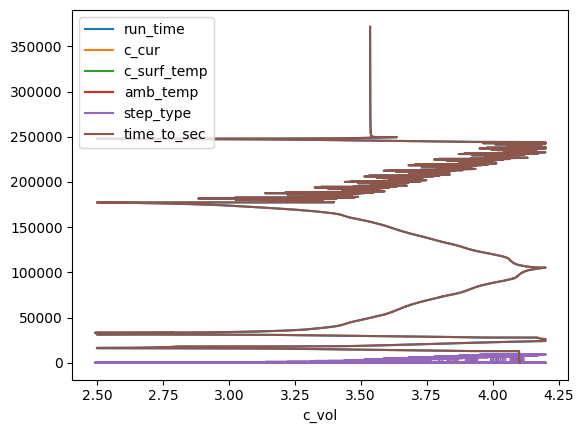

In [13]:
d.plot("c_vol")

In [18]:
data = {k: np.array(d[k]) for k in d.columns}

In [21]:
data

{'run_time': array([0.00000000e+00, 1.00000000e-03, 1.00000000e+01, ...,
        3.71590569e+05, 3.71612516e+05, 3.71612517e+05]),
 'c_vol': array([4.10350148, 4.10369225, 4.10369225, ..., 3.53557382, 3.53557382,
        3.53557382]),
 'c_cur': array([0., 0., 0., ..., 0., 0., 0.]),
 'c_surf_temp': array([45.25993, 45.25993, 45.25993, ..., 23.52188, 23.52493, 23.52493]),
 'amb_temp': array([44.98723984, 44.98723984, 45.01403809, ..., 23.01328468,
        23.02047348, 23.02047348]),
 'step_type': array([0., 0., 0., ..., 0., 0., 0.]),
 'time_to_sec': array([0.00000000e+00, 1.99900000e-03, 1.00000000e+01, ...,
        3.71590569e+05, 3.71612517e+05, 3.71612517e+05])}

In [19]:
import matplotlib.pyplot as plt

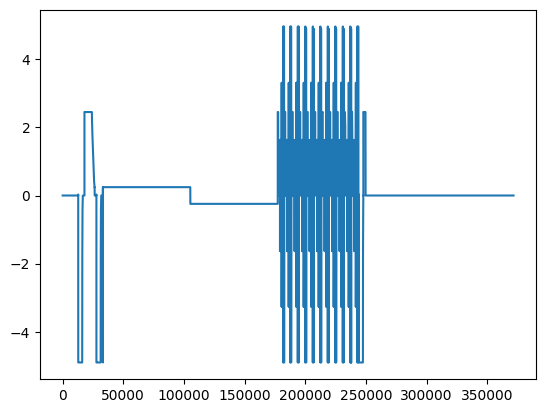

In [22]:
plt.plot(data["run_time"], data["c_cur"])

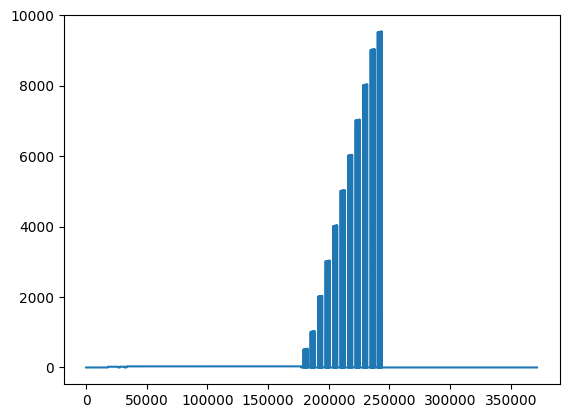

In [23]:
plt.plot(data["run_time"], data["step_type"])

In [24]:
import renewableopt.battery.feature_extraction as feat

In [25]:
pulse = feat.df_single_pulse(d)

In [66]:
def to_dict(df):
    return {k: np.array(df[k]) for k in df.columns}

In [31]:
p = {k: np.array(pulse[k]) for k in pulse.columns}

In [29]:
print(p.keys())

dict_keys(['run_time', 'c_vol', 'c_cur', 'c_surf_temp', 'amb_temp', 'step_type', 'time_to_sec'])


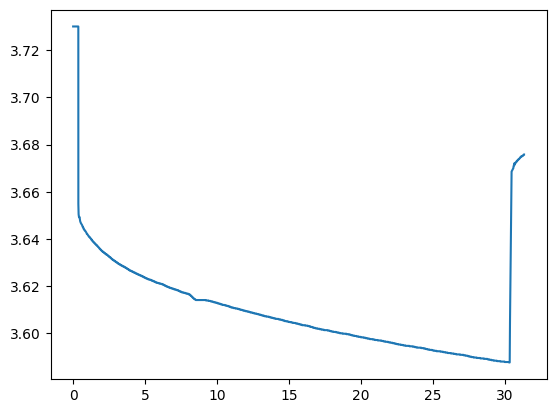

In [33]:
plt.plot(p["run_time"] - p["run_time"][0], p["c_vol"])

In [35]:
p['run_time'][0]

212324.36

In [37]:
longer_pulse = d[d["run_time"] >= (p['run_time'] - 40) & d["run_time"] <= (p['run_time'] + 40)]

ValueError: Arrays were different lengths: 318401 vs 1544

In [68]:
t0 = p['run_time'][0]
new_pulse = d[(d["run_time"] >= t0 - 200)
                & (d["run_time"] <= t0 + 300)]
new_pulse = to_dict(new_pulse)

In [69]:
len(new_pulse['run_time'])

4555

In [ ]:
new_pulse

In [70]:
def plot_current_and_volt(df_data):
    plt.figure()
    plt.plot(df_data["run_time"] - df_data["run_time"][0], df_data["c_cur"])

    plt.figure()
    plt.plot(df_data["run_time"] - df_data["run_time"][0], df_data["c_vol"])

In [74]:
dts = np.diff(new_pulse['run_time'])

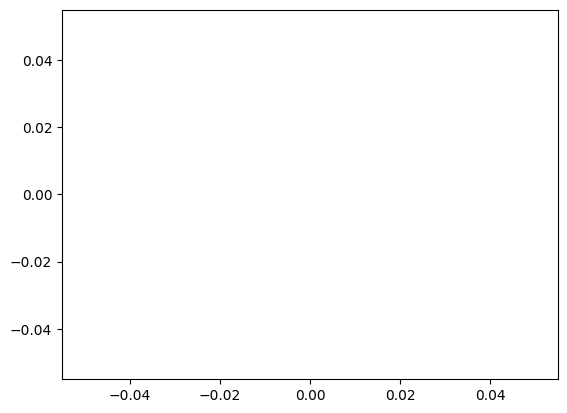

In [76]:
plt.figure()
plt.plot(min(dts))

In [78]:
min(dts[dts != 0])

0.001999999978579581

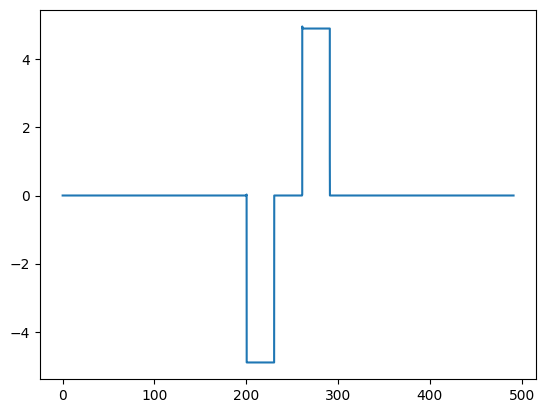

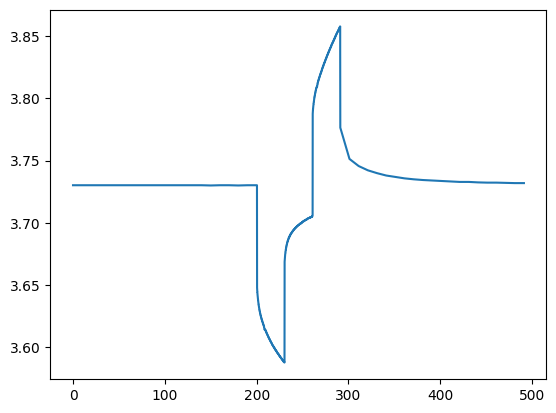

In [71]:
plot_current_and_volt(new_pulse)

In [79]:
from scipy.signal import lombscargle

In [82]:
t = new_pulse['run_time']
v = new_pulse['c_vol']

In [92]:
i = np.argwhere(np.diff(t) == 0)[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [86]:
t[i] == t[i+1]

True

In [88]:
def remove_doubled_time(p):
    i = np.argwhere(np.diff(p['run_time']) == 0)[0][0]
    return {
        k: np.r_[array[:i+1], array[i+2:]]
        for k, array in p.items()
    }
    

In [89]:
p_new = remove_doubled_time(new_pulse)

In [90]:
t = p_new['run_time']
v = p_new['c_vol']

In [91]:
v[i] == v[i+1]

False

In [83]:
sum(np.diff(t) == 0)

1

In [101]:
freq = lombscargle(t, v, np.linspace(1, 25, 200))

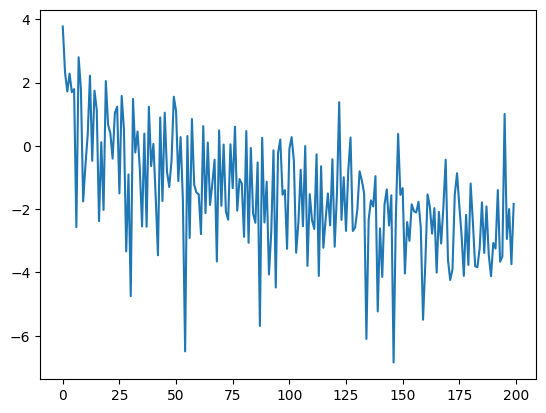

In [103]:
plt.plot(np.log(freq))

Well this signal is far too noisy to be of any use......

That's alright. All this EIS shit is really a distraction from my main goal of characterizing a model that can be used by
power system studies.